
## ***`> En caso que el ploteo resulte extraño volver a plotear (corriendo la celda de nuevo y funciona).`***
---





---

Instalamos y actualizamos las librerias a usar, en caso de crear el entorno de ejecución de 0 (ctrl+M y luego ctrl+F9) por favor una vez instaladas reinicie el entorno de ejecucion para poder hacer uso de las mismas

In [ ]:
%%capture
!pip install pandas -U
!pip install matplotlib -U
!pip install numpy -U

In [ ]:
#colab2PDF
%%capture
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc 
!pip install wkhtmltopdf
!pyppeteer-install
!pip install wkhtmltopdf
!pip install pdfkit

Defino funciones para utilizar mas tarde

In [ ]:
#arreglar csv para que el pandas lo pueda interpretar bien
import string as str
import numpy as np
!git clone  https://github.com/agusconde18/datos_peltier_int_fis.git 

for files in range(1,11):
  archivo="med%d.csv"%(files)
  try:
    
    ar = open('/content/datos_peltier_int_fis/datos_integrador_fisica/'+archivo, 'r').read()
    if(ar.find(';')!=-1):
      ar=ar.replace(',','.')
      ar=ar.replace(';',',')
      print("Archivo ",archivo," codificado")
    ar=ar.replace(' ','_')
    ar=ar.replace('C','c')
    ar=ar.replace('T','t')
    file = open(archivo, "w") 
    file.write(ar) 
    file.close() 
    
  except:
    print("Archivo ",archivo," no encontrado")

Cloning into 'datos_peltier_int_fis'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.
Archivo  med1.csv  codificado
Archivo  med2.csv  codificado
Archivo  med6.csv  codificado
Archivo  med7.csv  codificado
Archivo  med8.csv  codificado
Archivo  med9.csv  codificado
Archivo  med10.csv  codificado


In [ ]:
def prom(lista):
  return sum(lista)/len(lista)


Funciones para graficar:

In [ ]:
"""
En cont[1]=filas
en cont[2]=columnas
"""
def graf_temp( tiempo, cara_1, cara_2,t_amb, titulo, cont):
  plt.subplot(cont[1],cont[2],cont[0])
  cont[0]+=1
  plt.plot(tiempo,cara_1,label='cara 1')
  plt.plot(tiempo,cara_2,label='cara 2')
  plt.plot(tiempo,t_amb.astype(float), label='temp_ambiente')
  plt.xlabel('Tiempo [s]')
  plt.ylabel('Temperatura [°C]')
  plt.legend()
  plt.title(titulo)

def graf_dif(tiempo, dif_1,titulo,cont):
  plt.subplot(cont[1],cont[2],cont[0])
  cont[0]+=1
  plt.plot(tiempo,dif_1,label='diferencia caras')
  plt.title(titulo)
  plt.xlabel('Tiempo [s]')
  plt.ylabel('Temperatura [°C]')
  plt.legend()

def graf_grad(tiempo,grad_1,grad_2,titulo,cont):
  plt.subplot(cont[1],cont[2],cont[0])
  cont[0]+=1
  plt.plot(tiempo,grad_1,label='Gradiente 1')
  plt.plot(tiempo,grad_2,label='Gradiente 2')
  plt.title(titulo)
  plt.xlabel('Tiempo [s]')
  plt.ylabel('Temperatura [°C]')
  plt.legend()

def graf_corr(tiempo,corriente,delta_t,titulo,cont):
  ax1=plt.subplot(cont[1],cont[2],cont[0])
  ax2 = ax1.twinx()
  ax1.plot(tiempo,delta_t,'g-',label='Diferencia temp' )
  ax2.plot(tiempo,corriente,'b-',label='Corriente' )

  ax1.set_xlabel('Tiempo [s]')
  ax1.set_ylabel('Temperatura [°C]', color='g')
  ax2.set_ylabel('Corriente [A]', color='b')

  plt.legend()
  cont[0]+=1

def acomodar_graf():
  plt.tight_layout()
  plt.rcParams['figure.figsize'] = [30, 20]
  plt.rcParams['figure.dpi'] = 150 

def acomodar_graf_perz(dp,alto, ancho):
  plt.tight_layout()
  plt.rcParams['figure.figsize'] = [ancho, alto]
  plt.rcParams['figure.dpi'] = dp 

---

Lectura de medicion 1 en csv


In [ ]:
import pandas as pd

In [ ]:
med1 = pd.read_csv(r'med1.csv')
med1=med1.dropna()
med1.tail()

,temp_ambiente,temp_frio,temp_caliente
361,24.98,24.77,25.17
362,24.99,24.80,25.17
363,24.99,24.78,25.19
364,24.98,24.81,25.31
365,24.97,24.83,25.24


In [ ]:
med1['temp_caliente']

0      24.15
1      24.15
2      24.09
3      24.08
4      24.10
       ...  
361    25.17
362    25.17
363    25.19
364    25.31
365    25.24
Name: temp_caliente, Length: 366, dtype: float64

Calcularemos las diferencias de temperatura entre ambas caras en funcion del tiempo

In [ ]:
med1['dif_temp']=abs(med1['temp_caliente']-med1['temp_frio'])
med1['tiempo']=[0.531844 * i for i in range(len(med1['temp_ambiente']))]
med1.tail()

,temp_ambiente,temp_frio,temp_caliente,dif_temp,tiempo
361,24.98,24.77,25.17,0.40,191.995684
362,24.99,24.80,25.17,0.37,192.527528
363,24.99,24.78,25.19,0.41,193.059372
364,24.98,24.81,25.31,0.50,193.591216
365,24.97,24.83,25.24,0.41,194.123060


---

Importamos matplot lib para realizar los graficos correspondientes 


In [ ]:
from matplotlib import pyplot as plt


Ploteamos los valores obtenidos para tener una referencia visual de los mismos


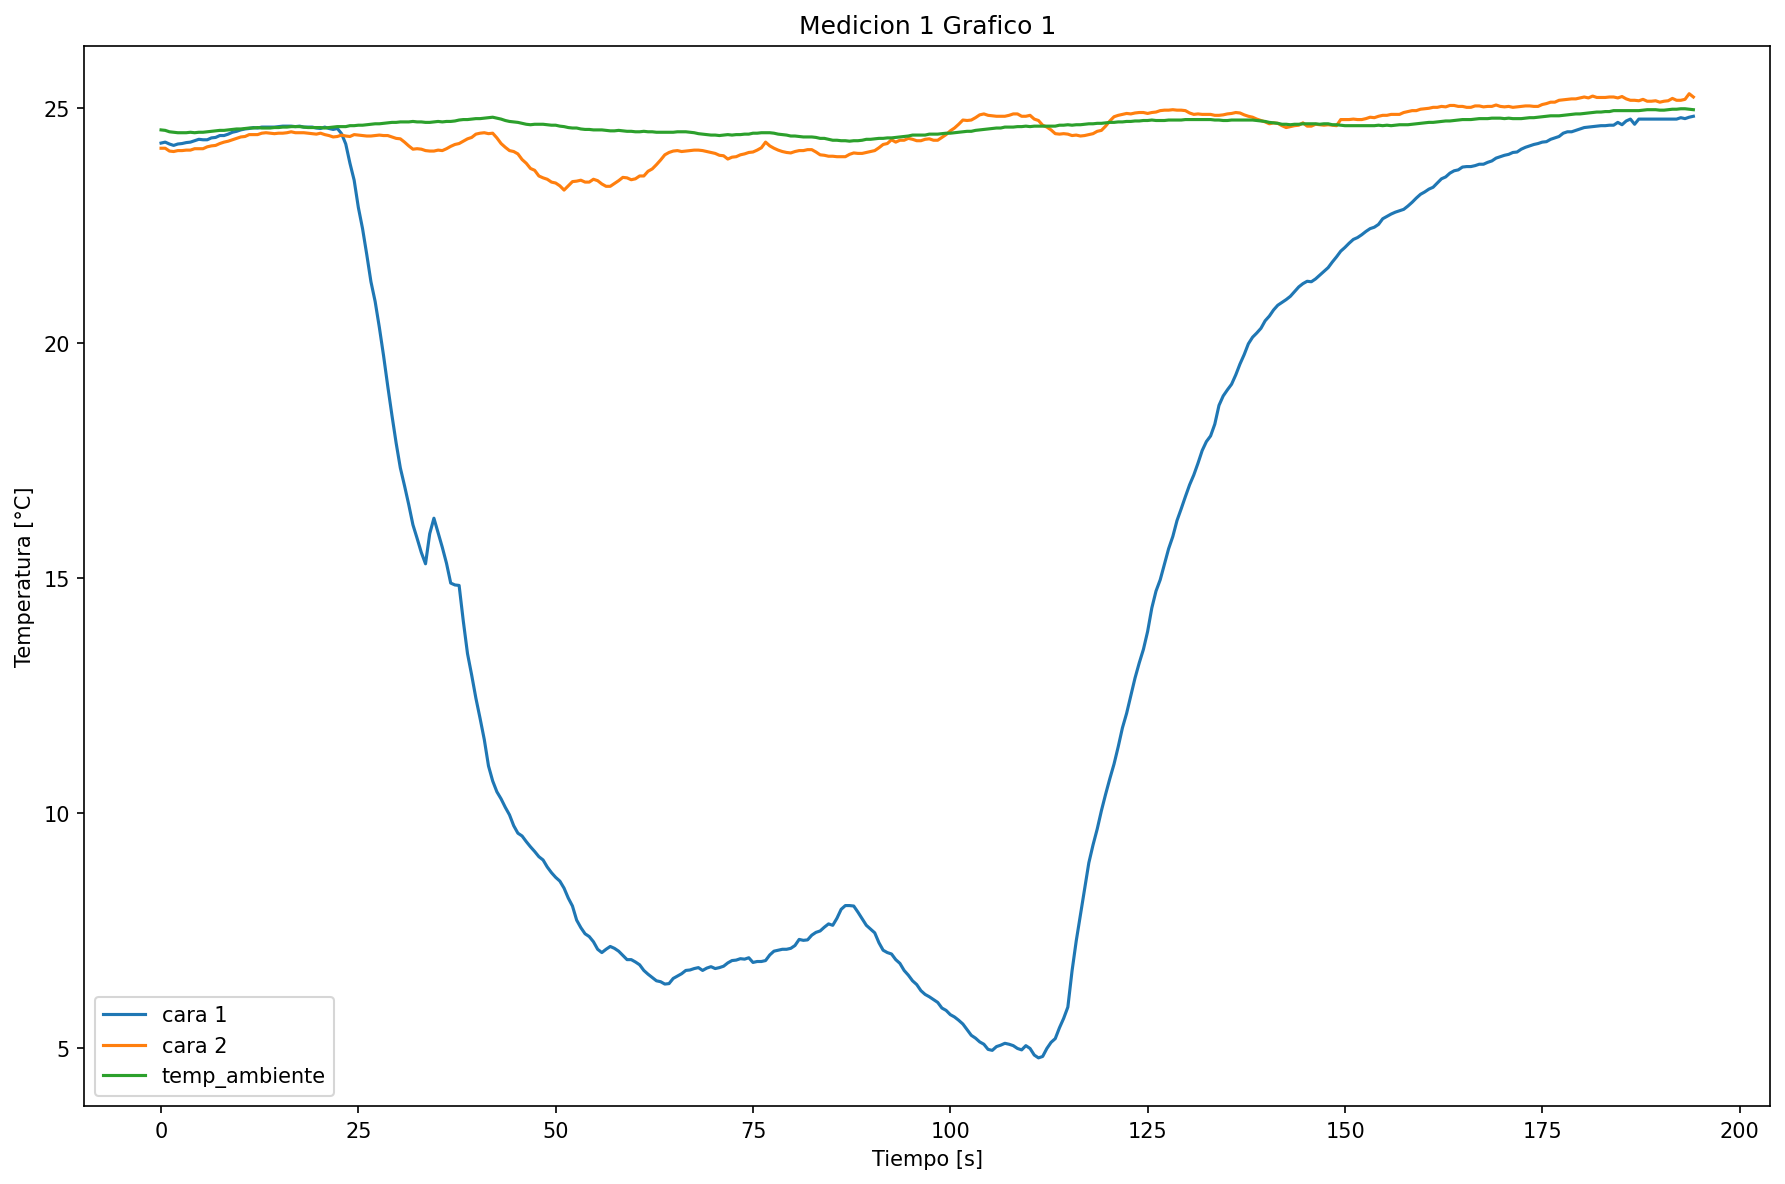

In [ ]:
scont=[1,1,1]
plt.clf()

graf_temp(med1['tiempo'],med1['temp_frio'],med1['temp_caliente'],med1['temp_ambiente'].astype(float),'Medicion 1 Grafico 1',cont)
acomodar_graf()

En la medicion anterior podemos observar que hay diferentes picos estos son debidos en gran parte a errores sistematicos de mediciones, por ejemplo un mal apoyo de la celda peltier con los sensores de temperatura.

Hay un pico en particular que queremos resaltar es el que esta entre 150 y 200 ya que en ese mismo se realizo una desconexion de la fuente de corriente constante de 1.7 Ampers y se la conecto en una de 2.1 Ampers lo cual se puede visualizar que a mayor corriente el dispositivo es capaz de generar una mayor diferencia de temperatura

---


En el siguiente codigo plotearemos la diferencia de temperatura entre ambas caras

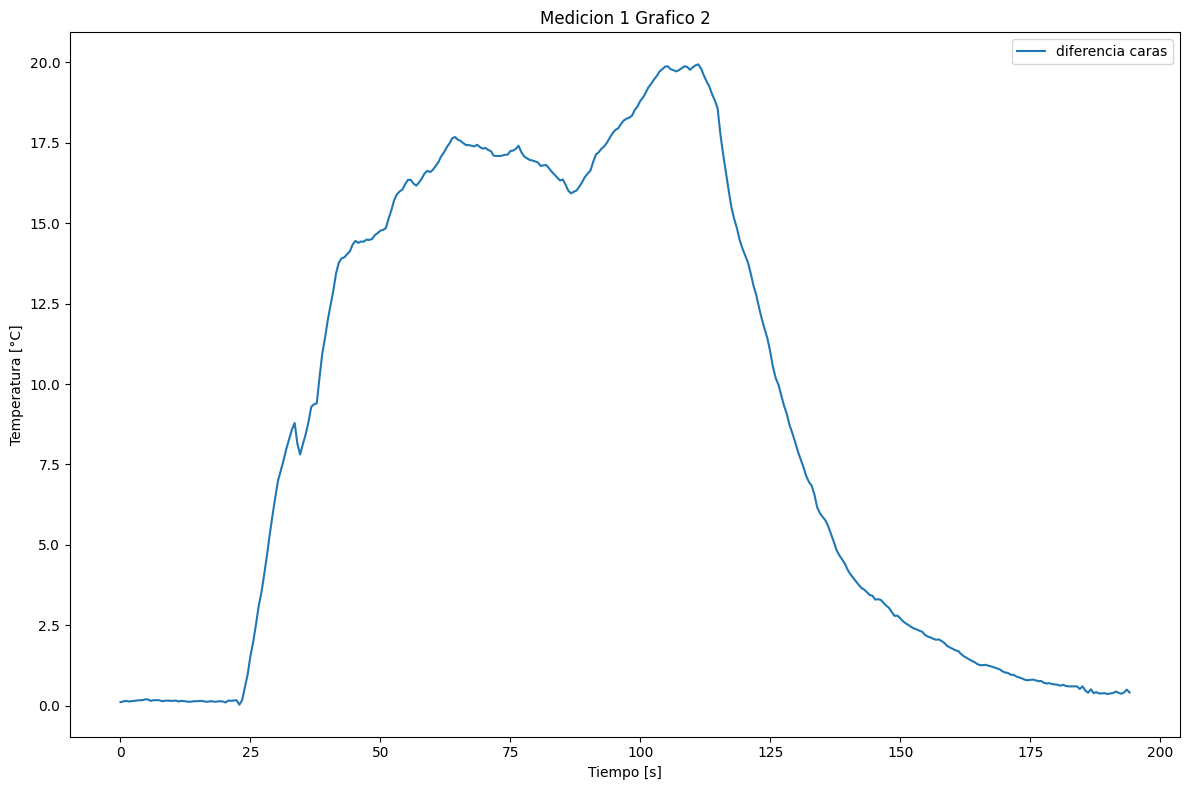

In [ ]:
#@title Texto de título predeterminado
plt.clf
cont=[1,1,1]
graf_dif(med1['tiempo'],med1['dif_temp'].astype(float),"Medicion 1 Grafico 2",cont)
acomodar_graf_perz(150,8,12)

Podemos observar que es muy similar al primer grafico debido a que la medicion de la cara caliente se mantuvo practicamente estable.

En la practica es imposible medir exactamente el valor de temperatura de la cara caliente debido a que la misma se encontraba contra un disipador de calor y en caso que ponga el sensor de temperatura entre la cara caliente y el disipador la celda peltier no lograria hacer el contacto adecuado y no podriamos obtener estas mediciones de baja temperatura y aplicacion en la vida real.

Para subsanar dichos problemas realizamos varias mediciones que podra seguir observando a lo largo de este codigo


---



En las siguientes dos lineas de codigo importaremos dos mediciones realizadas con un disipador sobre la cara caliente, mantienen el nombre med6 y med7 respectivamente porque fue el orden en que las realizamos, y se analarizaran en conjunto ya que ambas mediciones son muy similares y no vale la pena entrar en muchos detalles de cada una de las mediciones mientras se pueden abordar ambas al mismo tiempo 



Para ahorrar lineas de codigo en las mismas celdas calculo las diferencias de temperatura y las inserto en una columna del pandas dataframe

In [ ]:
med6 = pd.read_csv(r'med6.csv')
med6['dif_temp']=abs(med6['cara_1']-med6['cara_2'])
med6['tiempo']=[0.531844 * i for i in range(len(med6['temp_ambiente']))]
med6.tail()

,temp_ambiente,cara_1,cara_2,dif_temp,tiempo
419,27.38,26.37,26.58,0.21,222.842636
420,27.39,26.39,26.57,0.18,223.374480
421,27.38,26.39,26.56,0.17,223.906324
422,27.38,26.43,26.58,0.15,224.438168
423,27.38,26.42,26.56,0.14,224.970012


In [ ]:
med7 = pd.read_csv(r'med7.csv')
med7['dif_temp']=abs(med7['cara_1']-med7['cara_2'])
med7['tiempo']=[0.531844 * i for i in range(len(med7['temp_ambiente']))]
med7.tail()

,temp_ambiente,cara_1,cara_2,dif_temp,tiempo
317,27.50,27.48,27.55,0.07,168.594548
318,27.51,27.47,27.56,0.09,169.126392
319,27.51,27.48,28.13,0.65,169.658236
320,27.42,27.78,27.71,0.07,170.190080
321,27.49,27.54,27.69,0.15,170.721924


Procedo a plotear todos los valores significativos en las siguientes lineas de codigo

In [ ]:
rango_med6=range(len(med6['temp_ambiente']))
rango_med7=range(len(med7['temp_ambiente']))

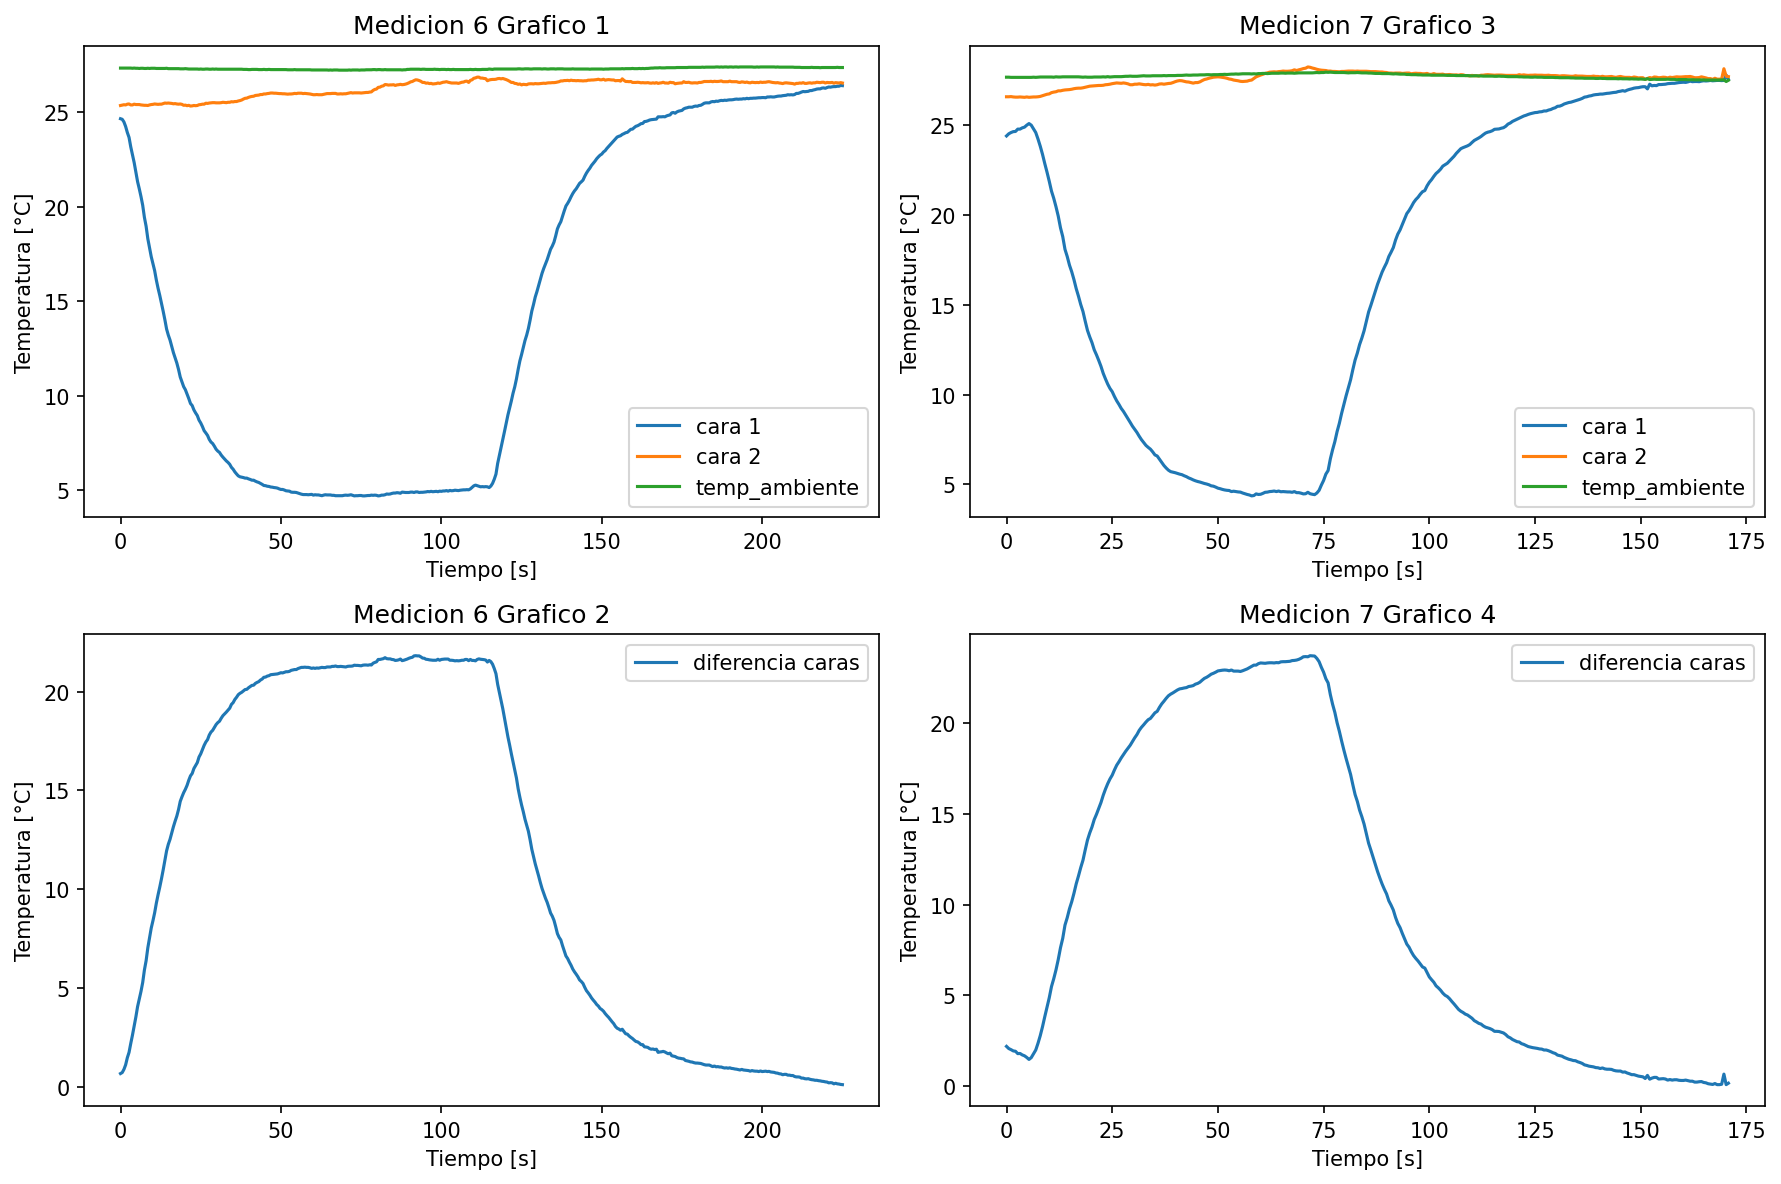

In [ ]:
#plt.subplot(row,col)
cont=[1,2,2]
plt.clf()
graf_temp(med6['tiempo'],med6['cara_1'],med6['cara_2'],med6['temp_ambiente'],"Medicion 6 Grafico 1",cont)
graf_temp(med7['tiempo'],med7['cara_1'],med7['cara_2'],med7['temp_ambiente'],"Medicion 7 Grafico 3",cont)
graf_dif(med6['tiempo'],med6['dif_temp'],"Medicion 6 Grafico 2",cont)
graf_dif(med7['tiempo'],med7['dif_temp'],"Medicion 7 Grafico 4",cont)
acomodar_graf_perz(150,8,12)

En los graficos 1 y 3 podemos observar las variaciones de temperatura en:

*   Verde: Observaremos la temperatura ambiente
*   Amarillo: Observaremos la temperatura del disipador en la parte mas cercana con la celda peltier
*   Azul: la temperatura de la cara fria de la celda peltier

Y por ultimo en los gradicos 2 y 4 podremos observar en azul las variaciones de temperatura respecto de ambas caras, las cuales podemos observar que son bastantes similares 

Calcularemos unos datos adicionales de la medicion 6

In [ ]:
print('Promedio de temperatura ambiente',prom(med6['temp_ambiente']))
print('Promedio de cara caliente',prom(med6['cara_2']))
print('Minima temperatura lado frio',min(med6['cara_1']))
print('Maxima diferencia de temperatura',max(med6['dif_temp']))

Promedio de temperatura ambiente 27.316674528301863
Promedio de cara caliente 26.295778301886763
Minima temperatura lado frio 4.71
Maxima diferencia de temperatura 21.810000000000002


Y haremos lo mismo para la medicion 7

In [ ]:
print('Promedio de temperatura ambiente',prom(med7['temp_ambiente']))
print('Promedio de cara caliente',prom(med7['cara_2']))
print('Minima temperatura lado frio',min(med7['cara_1']))
print('Maxima diferencia de temperatura',max(med7['dif_temp']))

Promedio de temperatura ambiente 27.718913043478295
Promedio de cara caliente 27.588354037267084
Minima temperatura lado frio 4.36
Maxima diferencia de temperatura 23.73


A partir de los graficos anteriores y los valores mostrados podemos observar que hay una cierta tendencia entre ambas mediciones de tener una diferencia de temperatura que suele ser muy similar y parece ser algo constante si le aplicamos una corriente constante esto mismo podemos observar que menciona el fabricante de nuestra celda peltier (Modelo TEC1-12706) lo cual nos lleva a la deduccion en base a todos los papers leidos y la practica que las peltier tienen un funcionamiento por diferencia de temperatura a la hora de extraer calor.

Otro dato que consideramos importante fue el uso de un disipador sobredimensionado para poder establecer una gran estabilidad termica de una cara de la celda peltier.

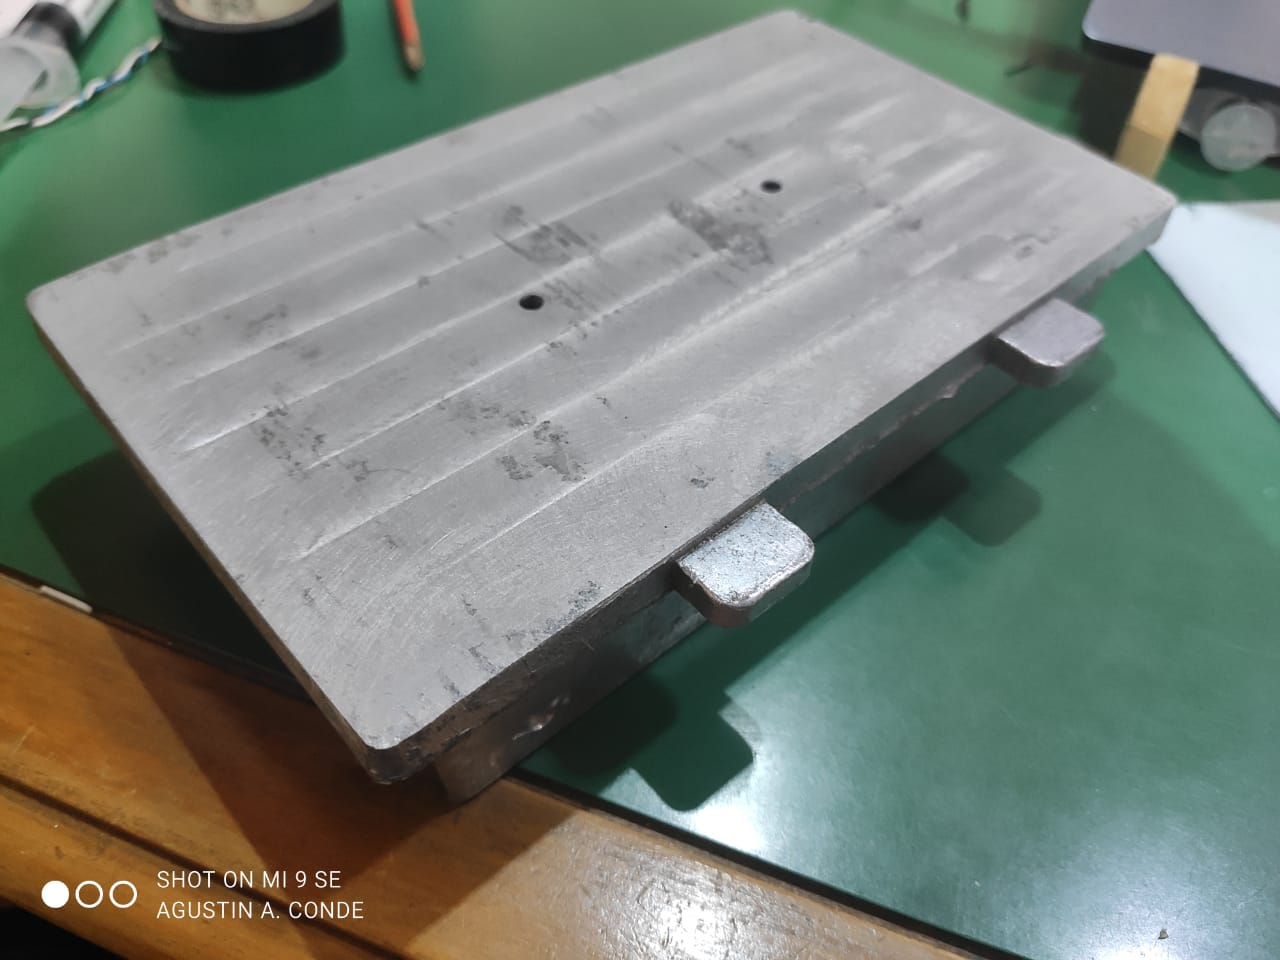

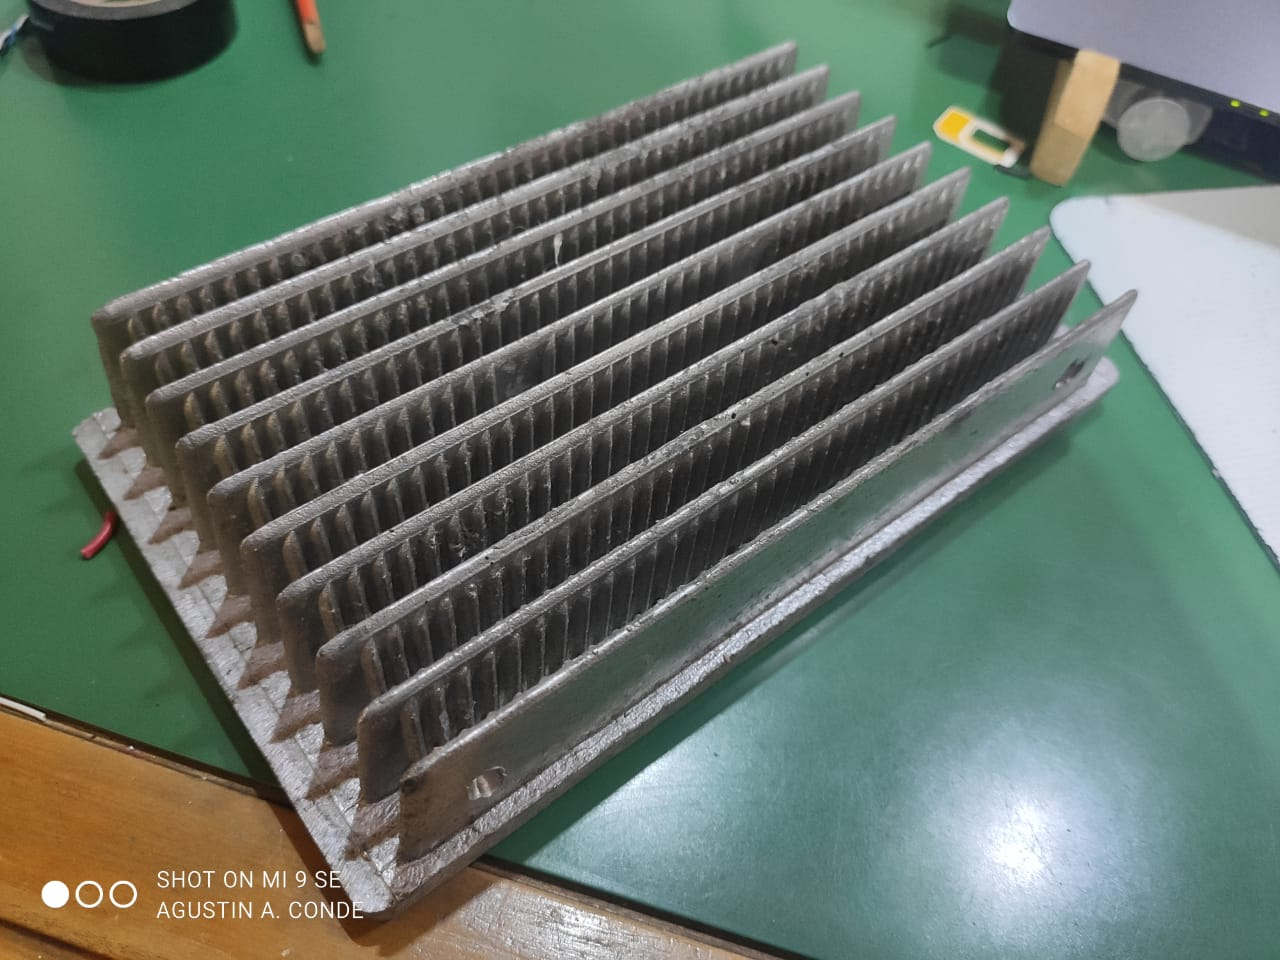



Esto se puede ver reflejado en la temperaturas promedio de ambas mediciones respecto a la temperatura ambiente, que como se dijo anteriormente ayudo a obtener valores precisos y muy fijos

Un detalle que no pudimos pasar por alto es que según las otras mediciones la celda genera una diferencia de entre 40 y 50 °C con esta excitación, por lo que asumimos que la cara caliente en la superficie de contacto está a 45-55 °C.

---

Se realiza todo lo hecho con anterioridad para las siguientes mediciones sin mucha explicación del funcionamiento del codigo ya que esta explicado anteriormente


In [ ]:
med4 = pd.read_csv(r'med4.csv')
med4=med4.dropna()
med4['dif_temp']=abs(med4['cara_1']-med4['cara_2'])
med4['grad_cara_1']=np.gradient(med4['cara_1'])
med4['grad_cara_2']=np.gradient(med4['cara_2'])
med4['tiempo']=[0.531844 * i for i in range(len(med4['temp_ambiente']))]
med4.tail()

,temp_ambiente,cara_1,cara_2,dif_temp,grad_cara_1,grad_cara_2,tiempo
2033,26.90,26.86,26.93,0.07,0.000,-0.010,1081.238852
2034,26.91,26.84,26.93,0.09,-0.010,0.005,1081.770696
2035,26.91,26.84,26.94,0.10,0.010,0.000,1082.302540
2036,26.91,26.86,26.93,0.07,0.005,0.000,1082.834384
2037,26.90,26.85,26.94,0.09,-0.010,0.010,1083.366228


In [ ]:
med3 = pd.read_csv(r'med3.csv')
med3=med3.dropna()
med3['dif_temp']=abs(med3['cara_1']-med3['cara_2'])
med3['grad_cara_1']=np.gradient(med3['cara_1'])
med3['grad_cara_2']=np.gradient(med3['cara_2'])
med3['tiempo']=[0.531844 * i for i in range(len(med3['temp_ambiente']))]
med3.tail()

,temp_ambiente,cara_1,cara_2,dif_temp,grad_cara_1,grad_cara_2,tiempo
692,24.84,40.70,40.24,0.46,-0.060,-0.10,368.036048
693,24.86,40.62,40.14,0.48,-0.050,-0.05,368.567892
694,24.86,40.60,40.14,0.46,-0.020,0.03,369.099736
695,24.84,40.58,40.20,0.38,-0.025,0.00,369.631580
696,24.84,40.55,40.14,0.41,-0.030,-0.06,370.163424


In [ ]:
med2 = pd.read_csv(r'med2.csv')
med2=med2.dropna()
med2['dif_temp']=abs(med2['cara_1']-med2['cara_2'])
med2['grad_cara_1']=np.gradient(med2['cara_1'])
med2['grad_cara_2']=np.gradient(med2['cara_2'])
med2['tiempo']=[0.531844 * i for i in range(len(med2['temp_ambiente']))]
med2.tail()

,temp_ambiente,cara_1,cara_2,dif_temp,grad_cara_1,grad_cara_2,tiempo
269,25.81,50.47,51.56,1.09,-0.045,-0.015,143.066036
270,25.81,50.51,51.55,1.04,-0.030,-0.010,143.597880
271,25.82,50.41,51.54,1.13,-0.065,0.000,144.129724
272,25.81,50.38,51.55,1.17,-0.035,-0.010,144.661568
273,25.81,50.34,51.52,1.18,-0.040,-0.030,145.193412


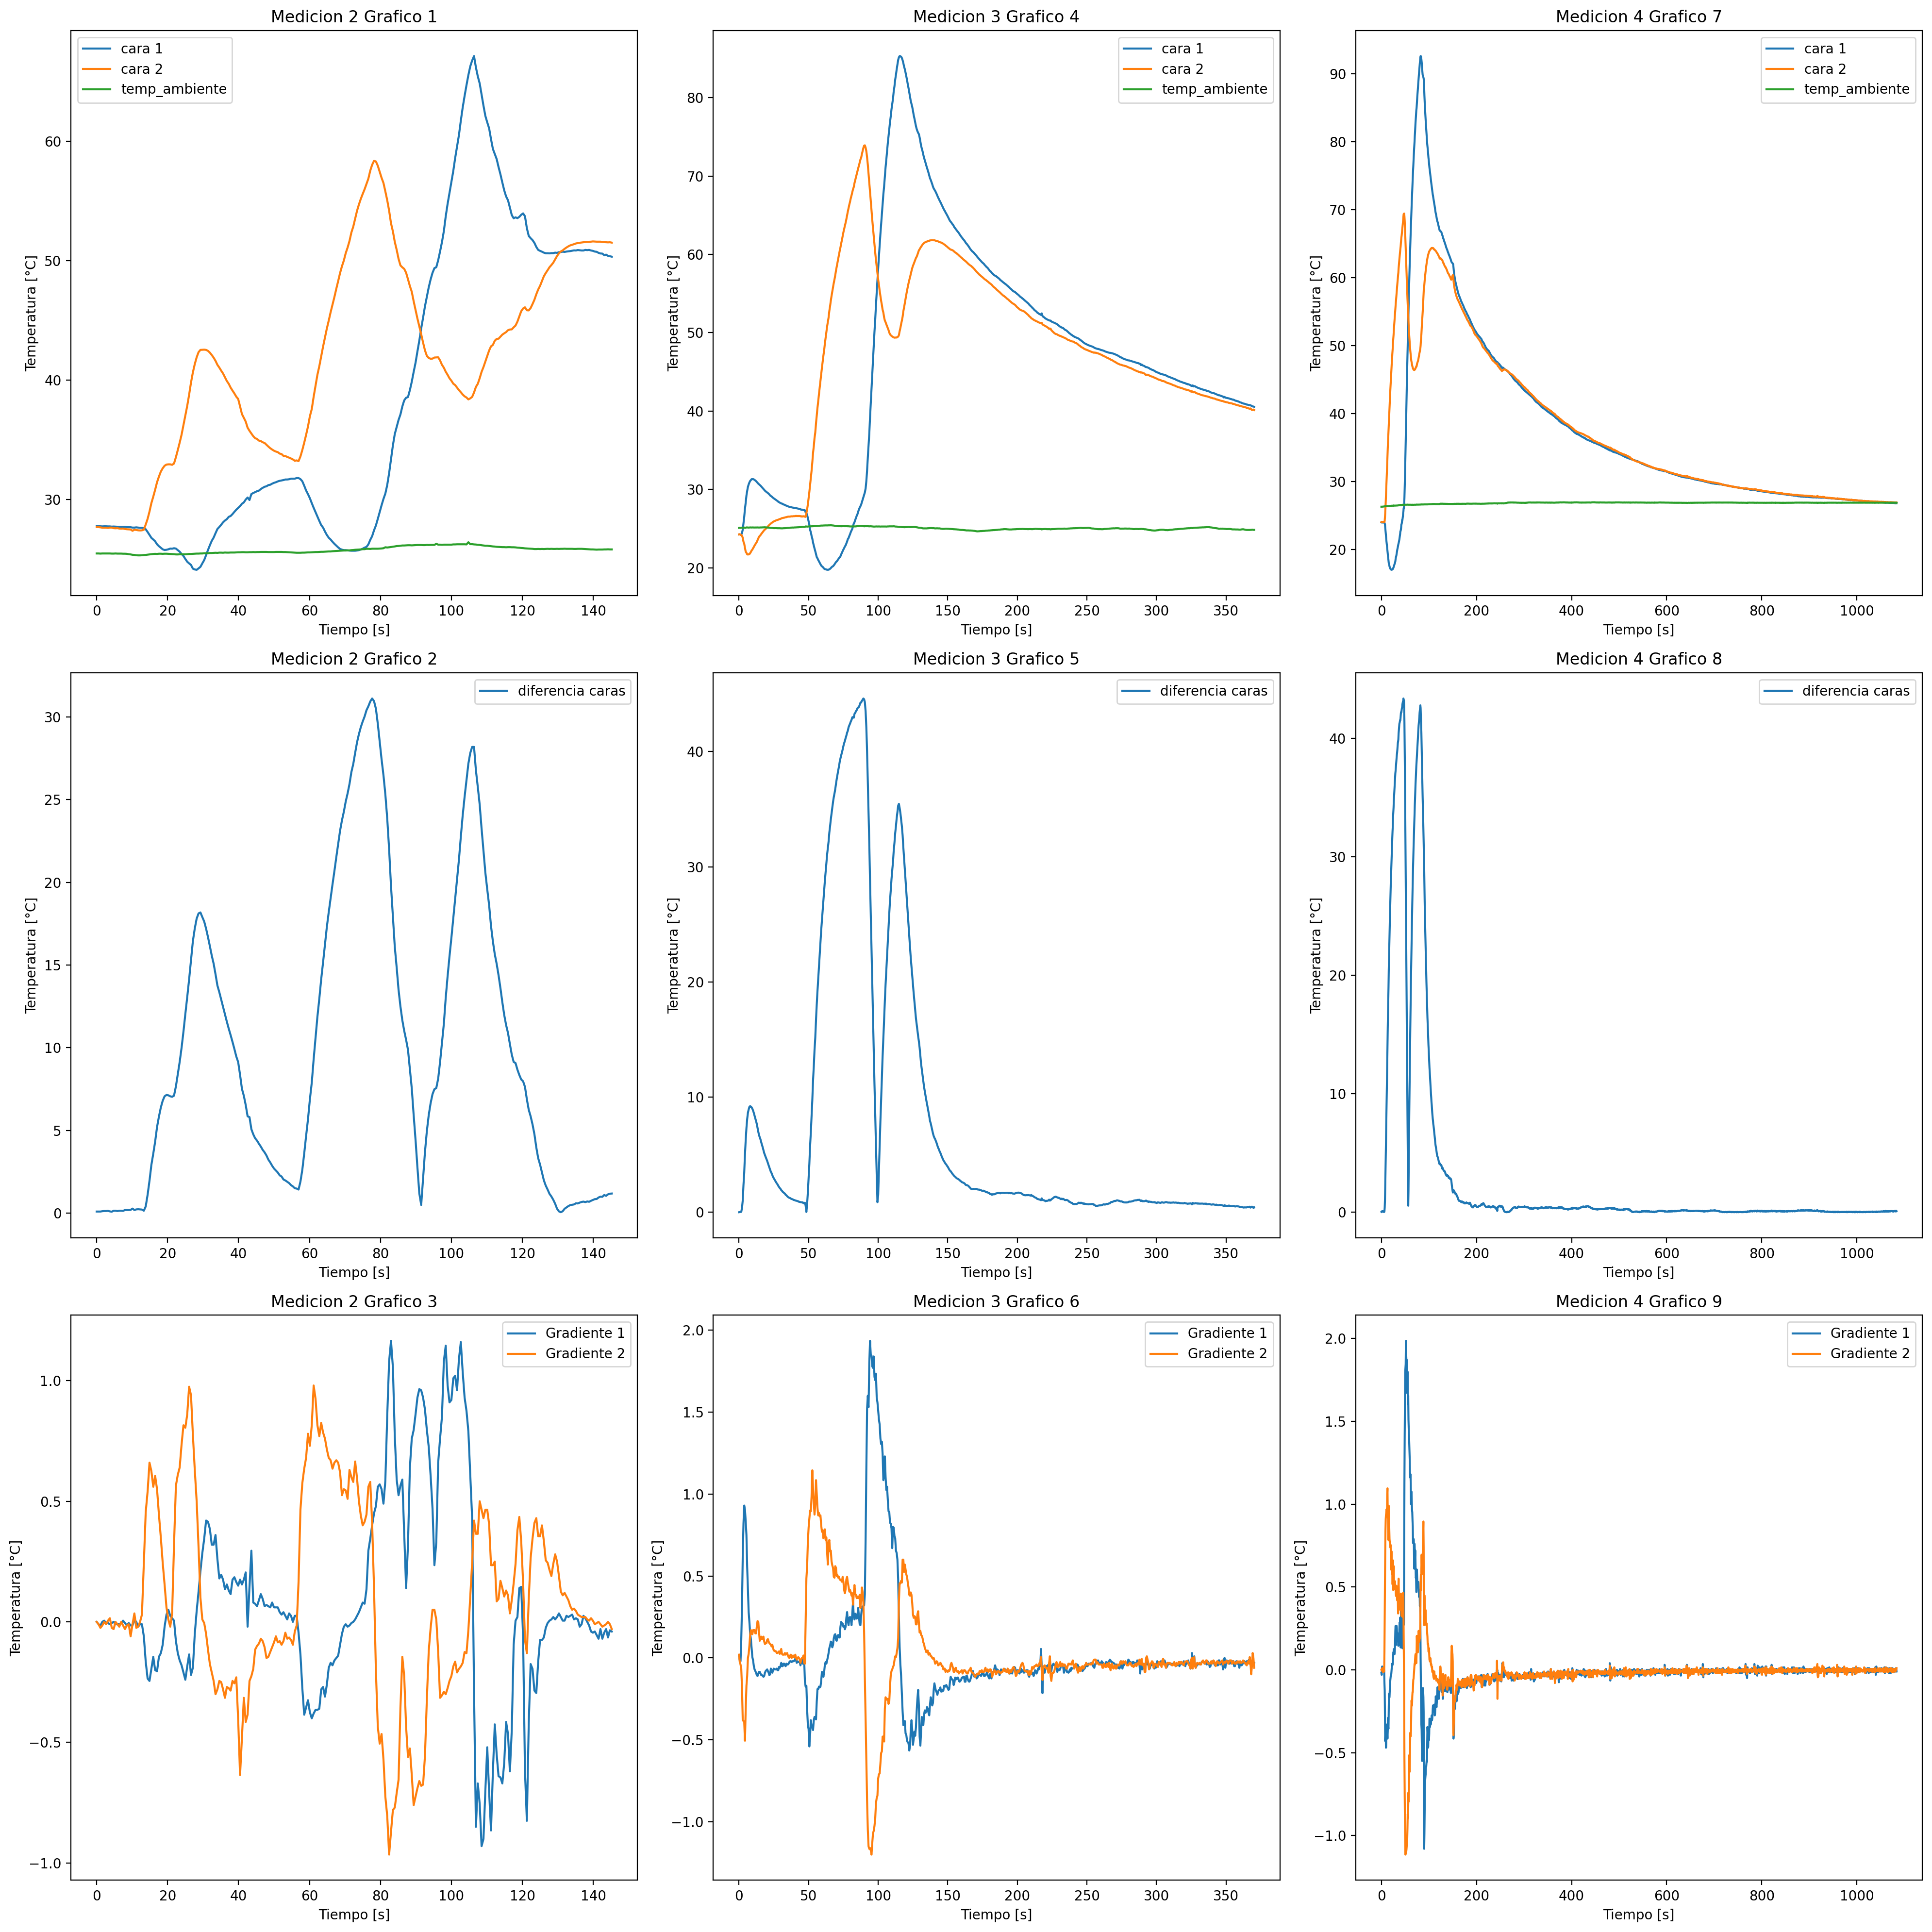

In [ ]:
plt.clf()
cont=[1,3,3]

graf_temp(med2['tiempo'],med2['cara_1'],med2['cara_2'],med2['temp_ambiente'],"Medicion 2 Grafico 1",cont)
graf_temp(med3['tiempo'],med3['cara_1'],med3['cara_2'],med3['temp_ambiente'],"Medicion 3 Grafico 4",cont)
graf_temp(med4['tiempo'],med4['cara_1'],med4['cara_2'],med4['temp_ambiente'],"Medicion 4 Grafico 7",cont)

graf_dif(med2['tiempo'],med2['dif_temp'],"Medicion 2 Grafico 2",cont)
graf_dif(med3['tiempo'],med3['dif_temp'],"Medicion 3 Grafico 5",cont)
graf_dif(med4['tiempo'],med4['dif_temp'],"Medicion 4 Grafico 8",cont)

graf_grad(med2['tiempo'],med2['grad_cara_1'],med2['grad_cara_2'],"Medicion 2 Grafico 3",cont)
graf_grad(med3['tiempo'],med3['grad_cara_1'],med3['grad_cara_2'],"Medicion 3 Grafico 6",cont)
graf_grad(med4['tiempo'],med4['grad_cara_1'],med4['grad_cara_2'],"Medicion 4 Grafico 9",cont)

acomodar_graf_perz(200,20,20)

En los graficos superiores podemos observar las mediciones de temperaturas, en los graficos de la fila 2 podemos observar medicones de diferencias de temperaturas entre ambas caras, y por ultimo en la ultima fila podemos observar los gradientes de temperatura que ocurren cada 532mS, esto es importante aclarar porque 532mS es el tiempo entre cada medicion.

En comparacion con las medidas anteriores es muy importente resaltar que estas medidas sobre las caras es una temperatura real y efectiva sobre las caras y no hay perdidas significantes en las mediciones ya que la celda se encontraba sin disipador como se puede observar en la siguiente imagen;

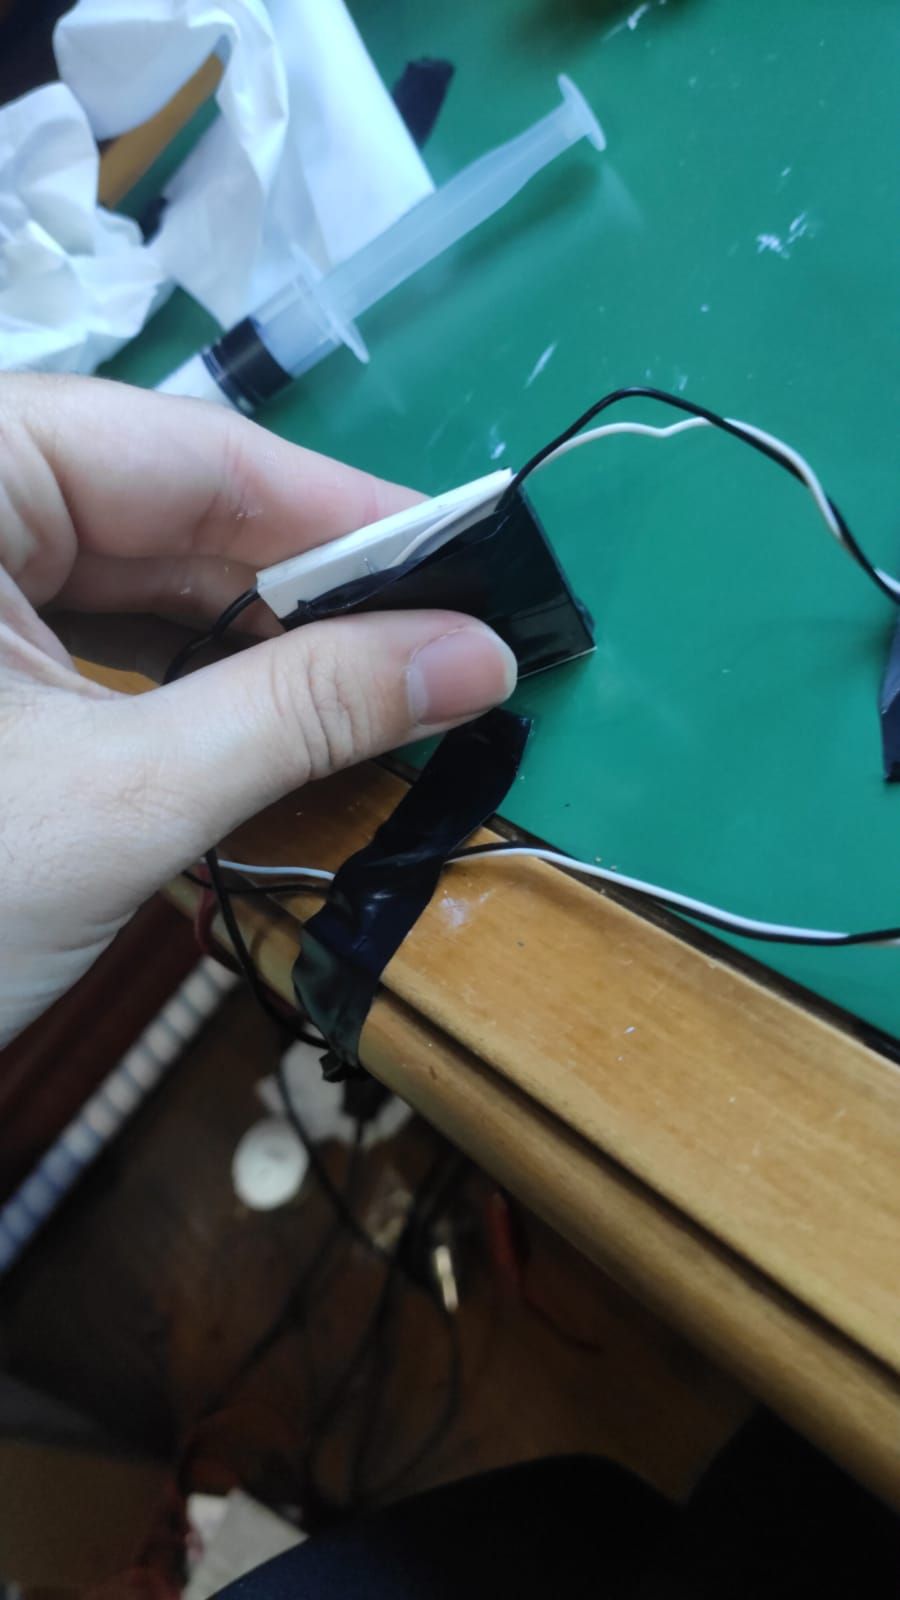

En las cuales ambas caras llevaban grasa siliconada junto al sensor 1N4148 para obtener la maxima transferencia de calor.

En los graficos es muy importante aclarar que se inicio la medicion y se conecto a la fuente la celda y se realizaron inversiones de tension para ver el comportamiento en inversa.

Descripcion de las acciones realizadas en las mediciones:


*   Medicion 2:
  1.   Se inició la medicion
  2.   Se conecto la fuente en directa
  3.   Se procedió con la desconexion de la fuente
  4.   Se volvió a conectar la fuente en directa
  5.   Se procedió nuevamente a desconectar la fuente
  6.   Se conectó la fuente en inversa
  7.   Se desconecto la fuente
  8.   Finalizo la medicion en una estabilizacion de temperaturas de ambas caras

*   Medicion 3:
  1.   Se inició la medicion
  2.   Se conecto la fuente en inversa
  3.   Se procedió con la desconexion de la fuente
  4.   Se conectó la fuente en directa
  5.   Se procedió nuevamente a desconectar la fuente
  6.   Se conectó la fuente en inversa
  7.   Se desconecto la fuente
  8.   Finalizo la medicion en una estabilizacion de temperaturas de ambas caras en un t mayor

*   Medicion 4:
  1.   Se inició la medicion
  2.   Se conecto la fuente en directa
  3.   Se procedió a desconectar la fuente
  4.   Se conectó la fuente en inversa
  5.   Se desconecto la fuente
  6.   Finalizo la medicion en una estabilizacion de temperaturas de ambas caras y con temperatura ambiente



De los graficos superiores se puede observar que una vez que se conecta la celda peltier genera una diferencia de temperatura entre ambas caras pero a su vez genera un efecto no deseado, el muy conocido efecto Joule que genera una perdida de energia en forma de calor lo cual vamos a calcular cuanto es la perdida de calor respecto del tiempo con la medicion 3 ya que es la que nos genera mejor precisión. 

In [ ]:
med5 = pd.read_csv(r'med5.csv')
med5['tiempo']=[0.531844 * i for i in range(len(med5['temp_ambiente']))]
med5['dif_temp']=abs(med5['cara_1']-med5['cara_2'])
med5['grad_1']=np.gradient(med5['cara_1'])
med5['grad_2']=np.gradient(med5['cara_2'])
med5.tail()

,temp_ambiente,cara_1,cara_2,tiempo,dif_temp,grad_1,grad_2
339,27.37,58.99,59.92,180.295116,0.93,-0.035,-0.060
340,27.39,58.96,59.85,180.826960,0.89,-0.035,-0.070
341,27.40,58.92,59.78,181.358804,0.86,-0.040,-0.065
342,27.41,58.88,59.72,181.890648,0.84,-0.040,-0.060
343,27.41,58.84,59.66,182.422492,0.82,-0.040,-0.060


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

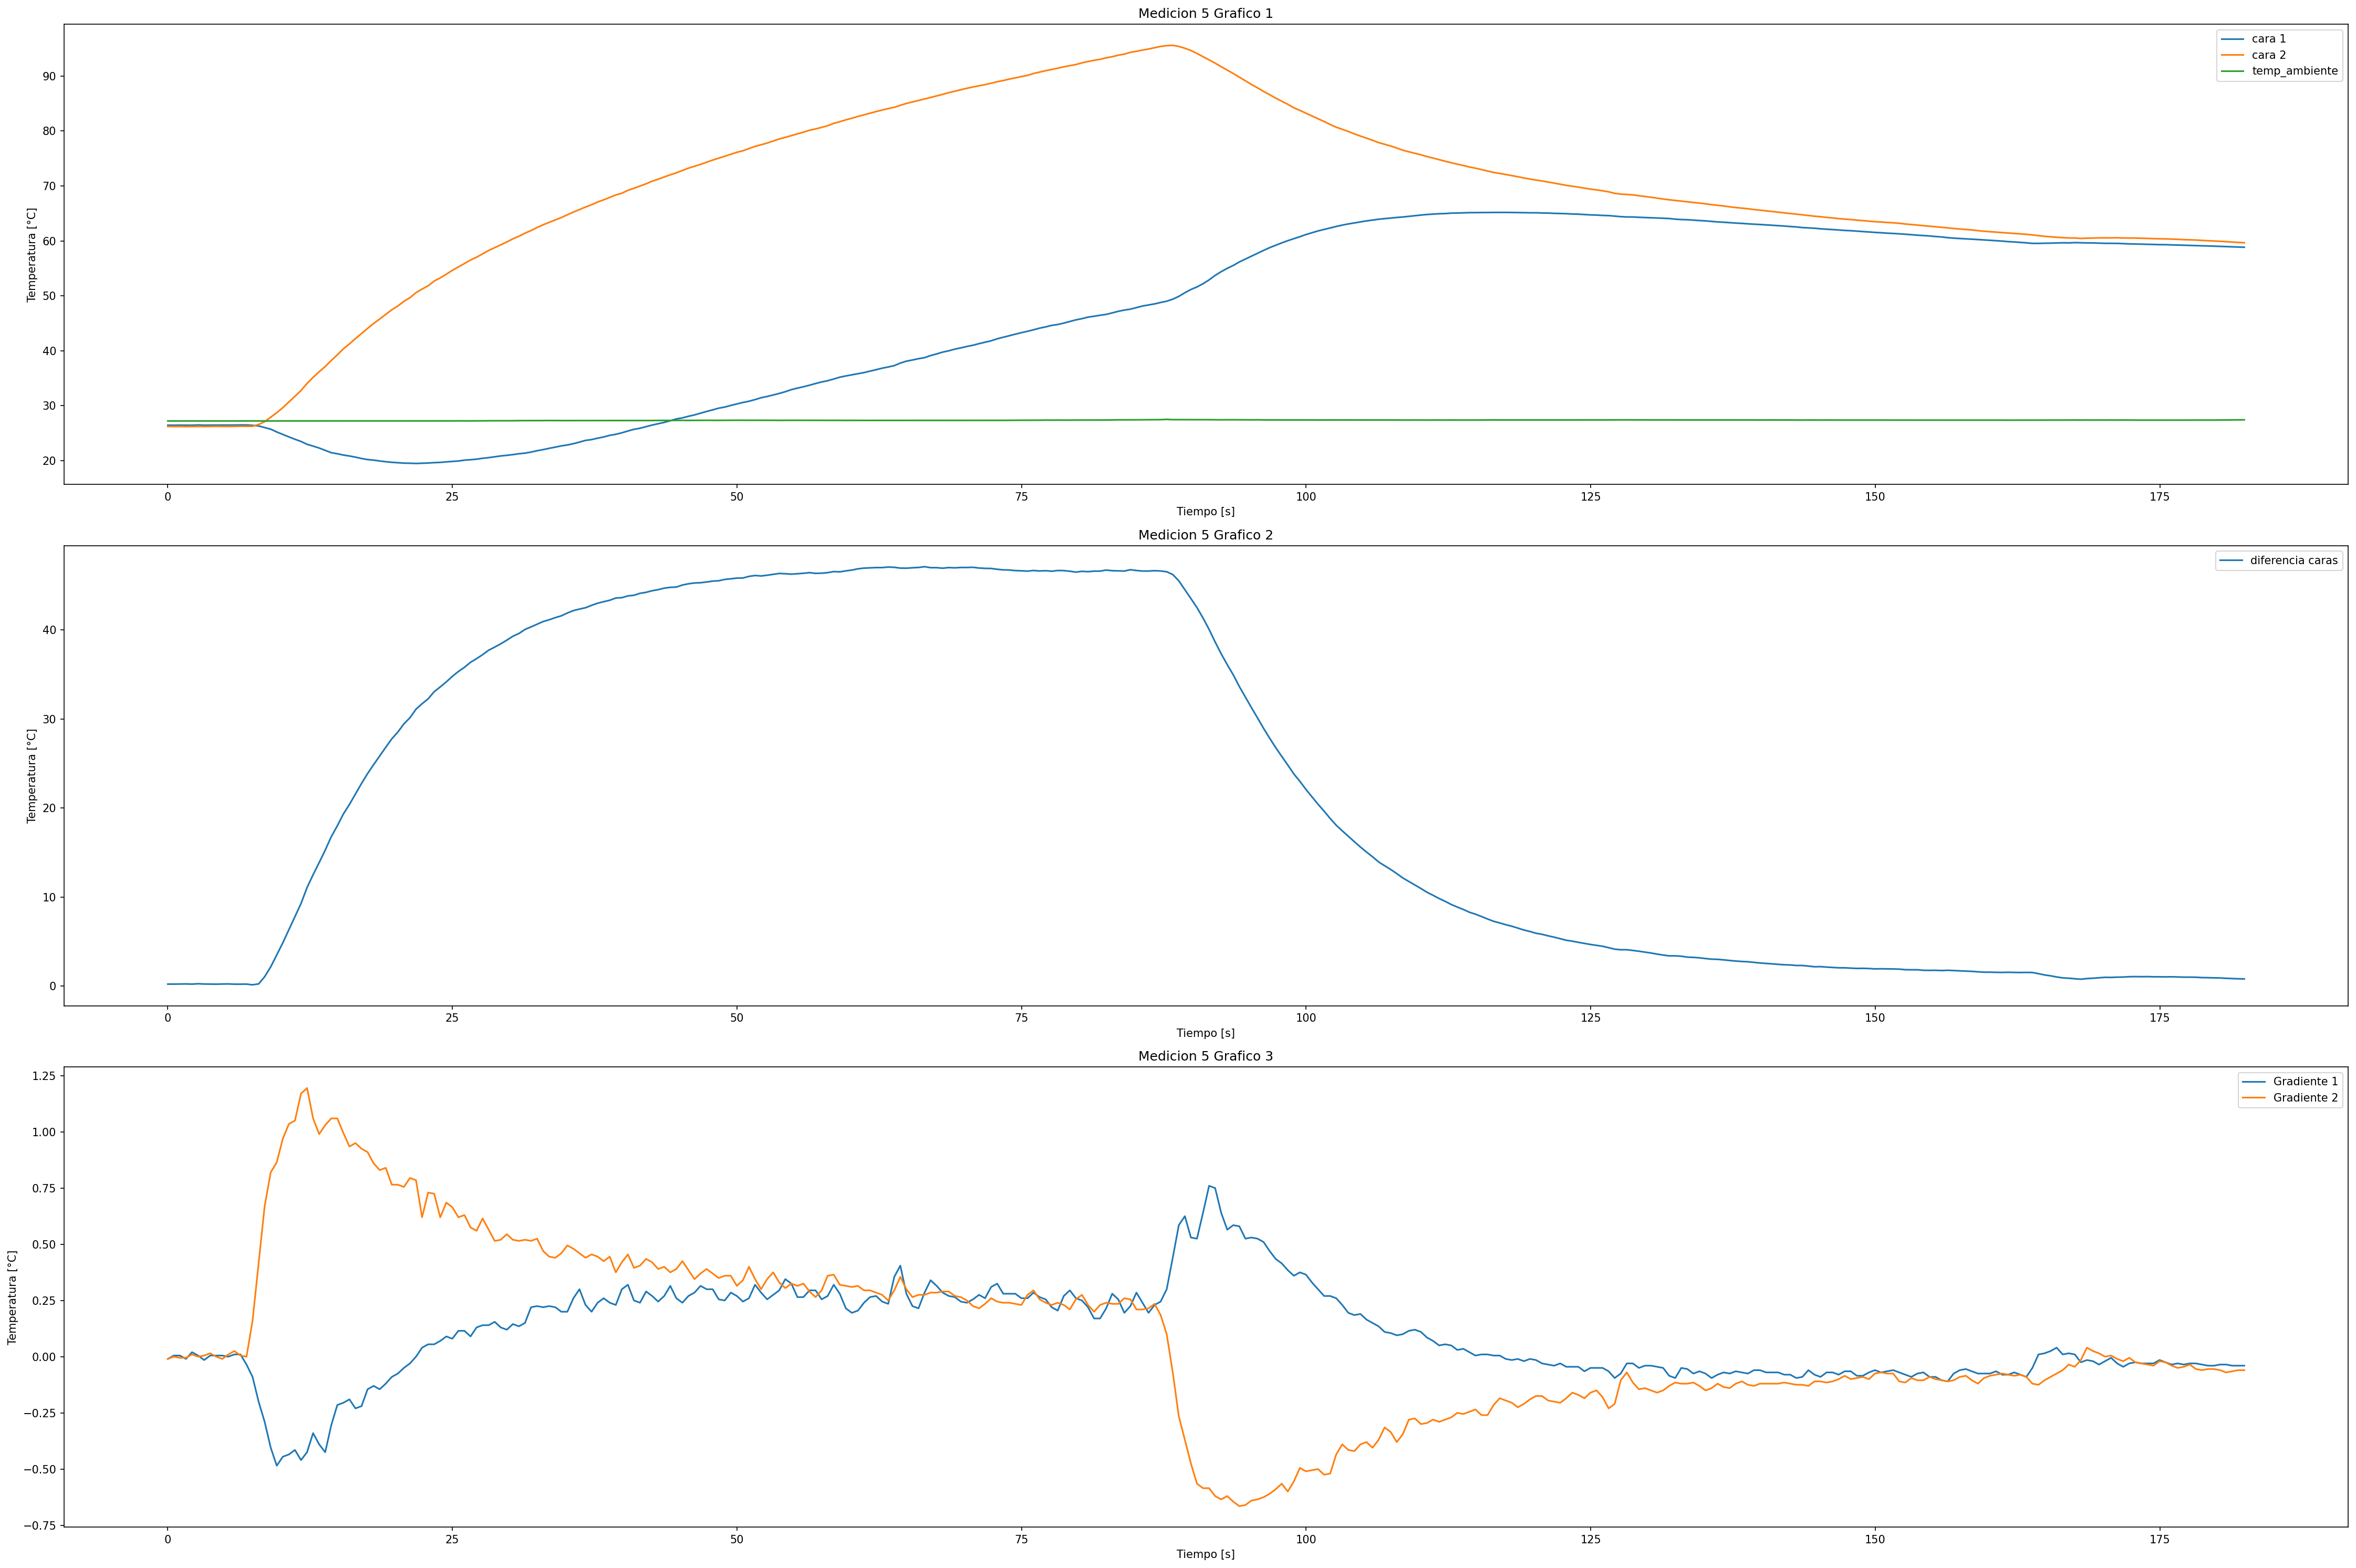

In [ ]:
plt.clf()
cont=[1,3,1]

graf_temp(med5['tiempo'],med5['cara_1'],med5['cara_2'],med5['temp_ambiente'],"Medicion 5 Grafico 1",cont)
graf_dif(med5['tiempo'],med5['dif_temp'],"Medicion 5 Grafico 2",cont)
graf_grad(med5['tiempo'],med5['grad_1'],med5['grad_2'],"Medicion 5 Grafico 3",cont)
acomodar_graf_perz(150,10,8)
plt

In [ ]:
med8 = pd.read_csv(r'med8.csv')
med8=med8.dropna()
med8['tiempo']=[0.531844 * i for i in range(len(med8['temp_amb']))]
med8['dif_temp']=abs(med8['cara_1']-med8['cara_2'])
med8['grad_1']=np.gradient(med8['cara_1'])
med8['grad_2']=np.gradient(med8['cara_2'])
med8.tail()

,temp_amb,cara_1,cara_2,corriente_A,tiempo,dif_temp,grad_1,grad_2
390,25.72,47.34,44.03,0.0,207.419160,3.31,-0.12,-0.120
391,25.71,47.20,43.91,0.0,207.951004,3.29,-0.11,-0.105
392,25.7,47.12,43.82,0.0,208.482848,3.30,-0.08,-0.090
393,25.7,47.04,43.73,0.0,209.014692,3.31,-0.09,-0.085
394,25.71,46.94,43.65,0.0,209.546536,3.29,-0.10,-0.080


In [ ]:
med9 = pd.read_csv(r'med9.csv')
med9['tiempo']=[0.531844 * i for i in range(len(med9['temp_amb']))]
med9['dif_temp']=abs(med9['cara_1']-med9['cara_2'])
med9['grad_1']=np.gradient(med9['cara_1'])
med9['grad_2']=np.gradient(med9['cara_2'])
med9.tail()

,temp_amb,cara_1,cara_2,corriente,tiempo,dif_temp,grad_1,grad_2
756,25.95,44.76,44.40,0.0,402.074064,0.36,-0.035,-0.025
757,25.95,44.72,44.39,0.0,402.605908,0.33,-0.030,-0.005
758,25.96,44.70,44.39,0.0,403.137752,0.31,-0.030,-0.020
759,25.96,44.66,44.35,0.0,403.669596,0.31,-0.045,-0.020
760,25.96,44.61,44.35,0.0,404.201440,0.26,-0.050,0.000


In [ ]:
med10 = pd.read_csv(r'med10.csv')
med10['dif_temp']=abs(med10['cara_1']-med10['cara_2'])
med10['temp_ambiente']=med10['temp_amb']
med10['grad_1']=np.gradient(med10['cara_1'])
med10['grad_2']=np.gradient(med10['cara_2'])
med10['t_ind']=med10['tiempo'].copy()
acc=0
del med10['tiempo']
lista_t=[]
for a in med10['t_ind']:
  lista_t.append((acc+a)/1000000)
  acc=acc+a
#del med10['temp_amb']
del med10['diferencia']
med10['tiempo']=lista_t
med10.tail()
med10.tail()

,temp_amb,cara_1,cara_2,corriente,dif_temp,temp_ambiente,grad_1,grad_2,t_ind,tiempo
1296,25.31,69.51,67.28,0.0,2.23,25.31,-0.26,-0.320,344908,447.504840
1297,25.32,69.19,66.94,0.0,2.25,25.32,-0.28,-0.285,344816,447.849656
1298,25.33,68.95,66.71,0.0,2.24,25.33,-0.26,-0.235,344856,448.194512
1299,25.35,68.67,66.47,0.0,2.20,25.35,-0.26,-0.275,344776,448.539288
1300,25.37,68.43,66.16,0.0,2.27,25.37,-0.24,-0.310,344612,448.883900


Funciones para graficar:

A continuacion usted podrá observar el codigo para realizar los graficos de las mediciones 8,9,10

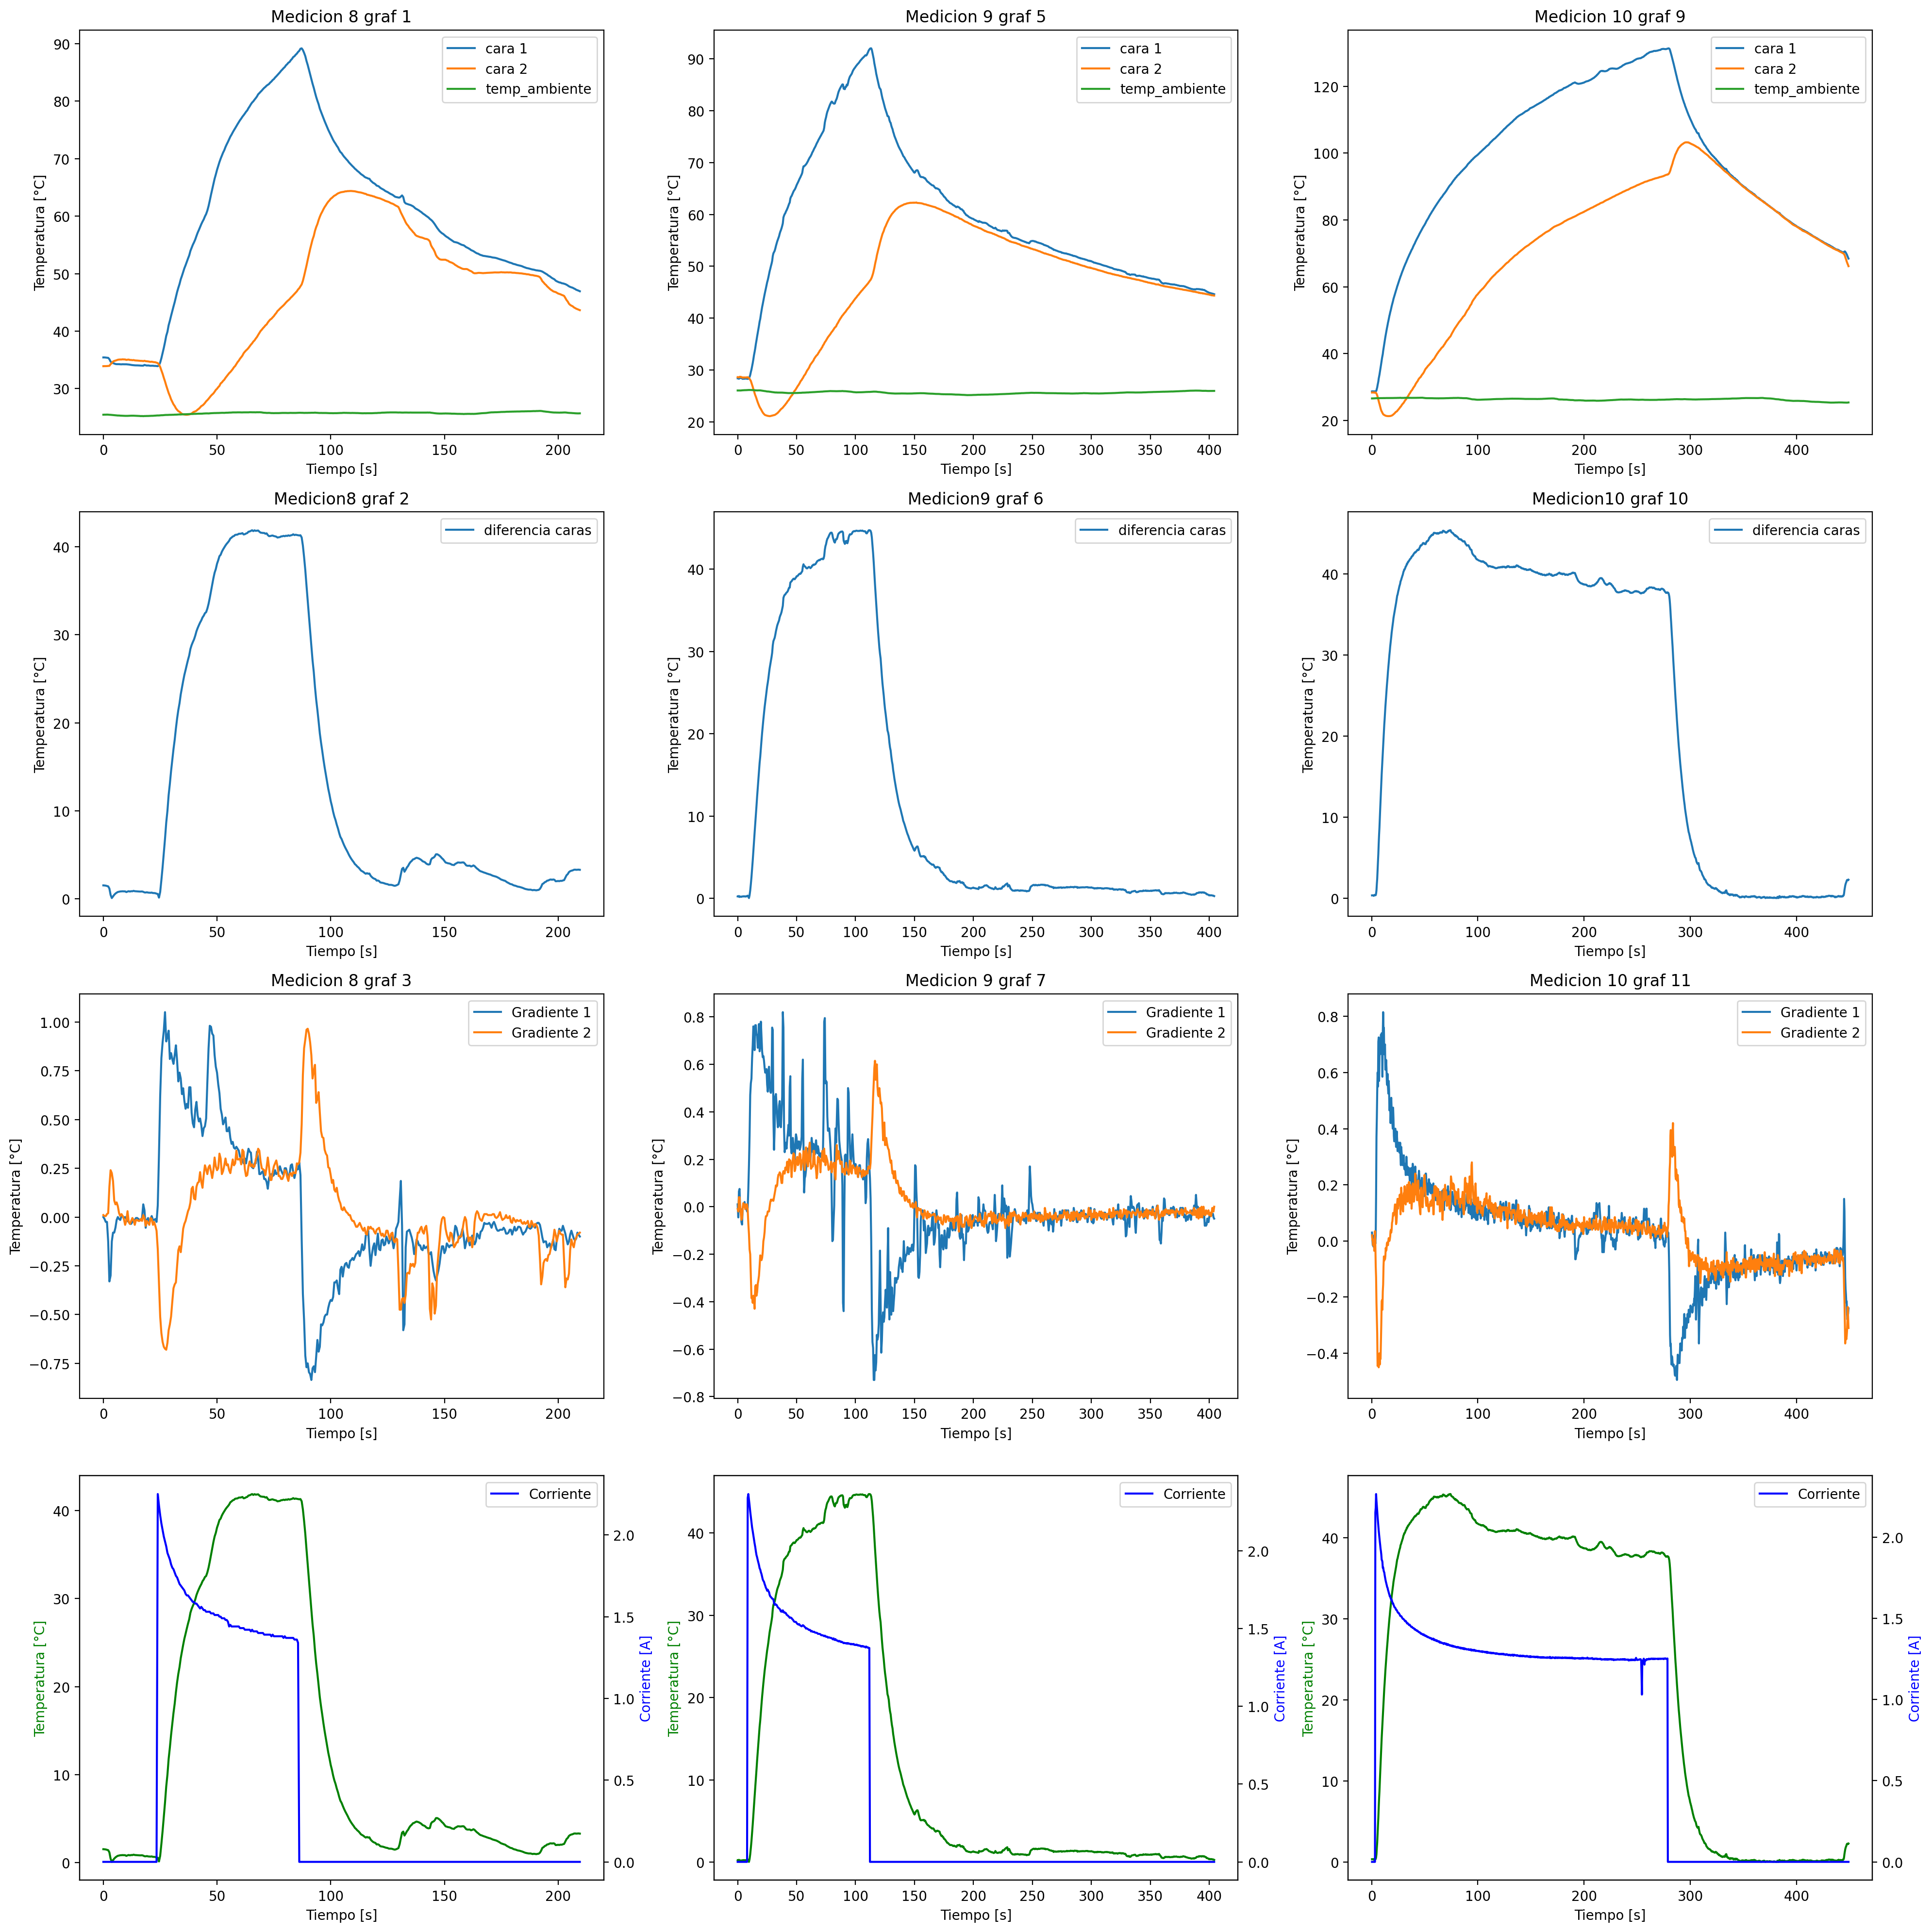

In [ ]:
plt.clf()
cont=[1,4,3]

graf_temp(med8['tiempo'],med8['cara_1'],med8['cara_2'],med8['temp_amb'],'Medicion 8 graf 1',cont)
graf_temp(med9['tiempo'],med9['cara_1'],med9['cara_2'],med9['temp_amb'],'Medicion 9 graf 5',cont)
graf_temp(med10['tiempo'],med10['cara_1'],med10['cara_2'],med10['temp_ambiente'],'Medicion 10 graf 9',cont)

graf_dif(med8['tiempo'],med8['dif_temp'],'Medicion8 graf 2',cont)
graf_dif(med9['tiempo'],med9['dif_temp'],'Medicion9 graf 6',cont)
graf_dif(med10['tiempo'],med10['dif_temp'],'Medicion10 graf 10',cont)

graf_grad(med8['tiempo'],med8['grad_1'],med8['grad_2'],'Medicion 8 graf 3',cont)
graf_grad(med9['tiempo'],med9['grad_1'],med9['grad_2'],'Medicion 9 graf 7',cont)
graf_grad(med10['tiempo'],med10['grad_1'],med10['grad_2'],'Medicion 10 graf 11',cont)

graf_corr(med8['tiempo'],med8['corriente_A'],med8['dif_temp'],'Medicion 8 graf 4',cont)
graf_corr(med9['tiempo'],med9['corriente'],med9['dif_temp'],'Medicion 9 graf 8',cont)
graf_corr(med10['tiempo'],med10['corriente'],med10['dif_temp'],'Medicion 10 graf 12',cont)

acomodar_graf_perz(150,30,20)



En las anteriores imagenes se puede ver un dato muy bueno que no teniamos antes, la corriente comparada con la diferencia de temperatura, podemos observar que cuando ambas caras se encuentran a la misma temperatura hay un consumo de corriente elevado y una vez que se ambas caras tienen una diferencia de temperatura cercana a los 50 grados la corriente se estabiliza y el dispositivo pasa a consumir de forma constante 13.61w (porque estaba alimentado con una fuente de 10,89V y una corriente de estabilizacion de 1.25A)

Otro dato que podemos resaltar es que en la tercer fila se observa el gradiente de temperatura de ambas caras, y se queda en evidencia que ante una desconexion o conexion instantanea se produce una variacion de temperatura muy rapida en ambas caras.

Una conclusion extra que habiamos apreciado en la primer medicion pero no podiamos demostrarla es que la celda peltier mantiene aproximadamente 45°C de diferencia entre ambas caras en nuestra configuracion, y segun la medicion del disipador nos daba que habia una diferencia de aproximadamente 20°C de lo cual podemos afirmar que esos 20°C caen entre la cara de la peltier y el disipador.

---

# ***Codigo de arduino utilizado para realizar las mediciones:***
Para la implementacion de este codigo debe ejecutarse necesariamente sobre un Atmega2560 en caso contrario deberá realizar modificaciones pertinentes



```
const int pinLM35 = A0;
float t0 = 22.5;
float vf0 = 0.616129;
float vf0_1 = 0.616129;
float reference = 1.1;
float max_digital = 1023;
void setup() {
  Serial.begin(2000000);
  analogReference(INTERNAL1V1);
  pinMode(A2, INPUT_PULLUP);
  pinMode(A3, INPUT_PULLUP);
  float leido = analogRead(pinLM35);
  //Serial.println(leido);
  float val1 = 0, val2 = 0;
  double temp_c = 0;
  for (int i = 0; i < 10000; i++) {
    leido = analogRead(pinLM35);
    temp_c += ((float)(leido / max_digital)) * reference * 100;
    val1 += analogRead(A2) * reference / max_digital;
    val2 += analogRead(A3) * reference / max_digital;
  }
  
  temp_c /= 10000;
  val1 /= 10000;
  val2 /= 10000;
  t0 = temp_c;
  vf0 = val1;
  vf0_1 = val2;

  Serial.println("Valores de calibracion:");
  Serial.println(t0, 20);
  Serial.println(vf0, 20);
  Serial.println(vf0_1, 20);

  t0=25.16695404052734375000;
  vf0=0.78939061164855957031;
  vf0_1=0.78580279350280761718;

}

long prom=0;
int cant_p=0;
void loop() {
  long tiempo=micros();
  float leido = analogRead(pinLM35);
  float temp_c = 0;
  for (int i = 0; i < 1000; i++) {
    leido = analogRead(pinLM35);
    temp_c += ((float)(leido / max_digital)) * reference * 100;
  }
  temp_c /= 1000;
  Serial.print(temp_c);


  float dtemp, dtemp_avg, t;
  dtemp_avg = 0;
  for (int  i = 0; i < 500; i++) {
    float vf = analogRead(A2) * (1.1 / 1023.000);
    //Serial.println(vf);
    dtemp = (vf - vf0) / 0.0022;
    dtemp_avg = dtemp_avg + dtemp;
  }
  t = t0 - dtemp_avg / 500;
  Serial.print("," );
  Serial.print(t);

  dtemp_avg = 0;
  for (int  i = 0; i < 500; i++) {
    float vf = analogRead(A3) * (1.1 / 1023.000);
    //Serial.println(vf);
    dtemp = (vf - vf0_1) / 0.0022;
    dtemp_avg = dtemp_avg + dtemp;
  }
  t = t0 - dtemp_avg / 500;
  Serial.print("," );
  Serial.print(t);
  float corr_av = 0;
  for (int  i = 0; i < 10; i++) {
    float vf = analogRead(A4) ;
    vf=vf/1023;
    vf=vf*1.1;
    corr_av += vf*4;
  }
  float corriente =  corr_av / 10;

  Serial.print("," );
  Serial.print(corriente,20);
  Serial.print("," );
  Serial.print(micros()-tiempo);
  Serial.println();

```

---

El siguiente codigo es para exportar el notebook como html o pdf, personalmente no recomiendo exportar como pdf sino convertir el html con alguna web o el navegador ya que queda muy desustructurado.

Es muy importante que tengas guardado en notebook en tu drive la siguiente direccion: "drive/My Drive/Colab Notebooks/Integrador Fisica.ipynb"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture

!cp 'drive/My Drive/Colab Notebooks/Integrador Fisica.ipynb' ./
!jupyter nbconvert --to html "Integrador Fisica.ipynb" 
!jupyter nbconvert --to pdf "Integrador Fisica.ipynb"
